In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import torch
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

In [176]:
from src.vit_data import load_cd_data

vit_data = load_cd_data()

In [177]:
from src.data_loader import ViTDataLoader

dataloader = ViTDataLoader(vit_data, split_type='time', split_arg=120.0)
print(dataloader.split_repr())

Split: time,120.0; Training: 19921; Validation: 2214; Testing: 4427


In [163]:
len(dataloader.trainloader.dataset), len(dataloader.validationloader.dataset), len(dataloader.testloader.dataset)

(19921, 2214, 4427)

In [87]:
from src.vit_train import ViTTrainer, load_model_dir, load_model_config
import importlib

config = importlib.import_module(f"config.simple")
vit = load_model_config(config)
trainer = ViTTrainer(vit, dataloader)


In [88]:
device = trainer.device
vit = trainer.vit


In [89]:
trainer.setup()

Creating directory: output/vit_1_20220523_3b54...


In [ ]:
trainer.train()

In [151]:
vit.load_state_dict(torch.load('/Users/trung/Downloads/model.torch.14000', map_location=torch.device('cpu')))

<All keys matched successfully>

In [152]:
trainer.compute_predictions_losses()

In [153]:
print(trainer.perf_str)

Loss:
  Train:	0.958
  Valid:	0.956
  Test: 	0.488

R2:
  Train:	0.128
  Valid:	0.104
  Test: 	-0.491


In [158]:
#trainer.dataloader.trainloader.dataset[0:10]

(array([  53.,  325., 2036., 8298., 9438., 4213., 1537.,  496.,  137.,
          29.]),
 array([-3.78572687, -2.91519267, -2.04465848, -1.17412428, -0.30359008,
         0.56694412,  1.43747832,  2.30801251,  3.17854671,  4.04908091,
         4.91961511]),
 <BarContainer object of 10 artists>)

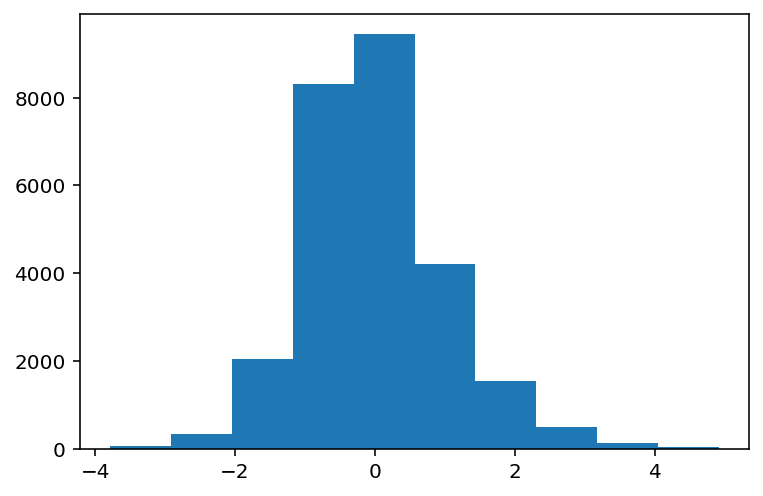

In [179]:
plt.hist(dataloader.dataset.TPM)